# lab4 - 集成学习

In [8]:
import warnings


warnings.filterwarnings('ignore')

## Задание 1

Исследуйте зависимость качества классификации от количества классификаторов в ансамбле для алгоритмов бэггинга на наборе данных glass.csv с различными базовыми классификаторами. Постройте графики зависимости качества классификации при различном числе классификаторов, объясните полученные результаты. 

在 glass.csv数据集上，用不同的基本分类器研究分类质量对集合中分类器数量的依赖。绘制不同数量分类器的分类质量的依赖性，解释结果

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


def plot_bagging_ensemble(base_estimator, max_num_estimator, x_train, x_test, y_train, y_test, title):
    """绘制分类器数量和预测得分的关系图"""
    arr_score = []
    arr_num_tesimator = range(1, max_num_estimator)
    for i in arr_num_tesimator:
        ensemble_estimator = BaggingClassifier(base_estimator=base_estimator, n_estimators=i, bootstrap=True, random_state=90102)
        ensemble_estimator.fit(X=x_train, y=y_train)
        score = ensemble_estimator.score(X=x_test, y=y_test)
        arr_score.append(score)

    print('Best score in ensemble with bagging: ', max(arr_score))
    plt.figure(figsize=(40, 20), dpi=40)
    plt.plot(arr_num_tesimator, arr_score, c='b')
    plt.title(title, size=34)
    plt.xlabel('Number of estimator', size=34)
    plt.ylabel('Score', size=34)
    plt.tick_params(labelsize=28)
    plt.show()
    pass


data = pd.read_csv('glass.csv')
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, 1:-1], data.iloc[:, -1:], random_state=90102)

Best estimator in KNN:  KNeighborsClassifier(metric='manhattan', n_neighbors=1)
Predict score in KNN: 0.7222222222222222
Best score in ensemble with bagging:  0.7407407407407407


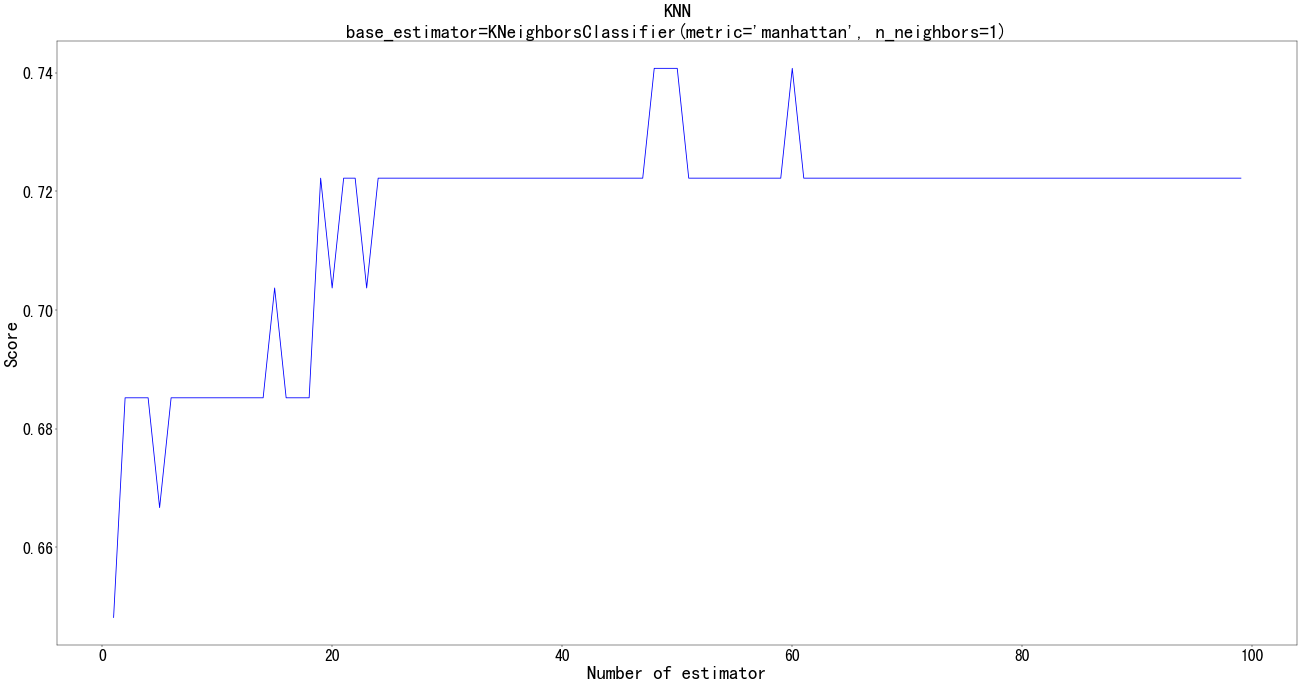

In [11]:
# KNN
# 先通过网格搜索找到最佳参数
# Сначала найдите наилучшие параметры путем поиска по сетке
para_grid = {
    'n_neighbors': range(1, 20),
    'metric': ('euclidean', 'manhattan', 'chebyshev', 'minkowski')
}
estimator = KNeighborsClassifier()
estimator = GridSearchCV(estimator=estimator, param_grid=para_grid, cv=10)
estimator = estimator.fit(X=x_train, y=y_train).best_estimator_
print('Best estimator in KNN: ', estimator)
print('Predict score in KNN:', estimator.score(X=x_test, y=y_test))
plot_bagging_ensemble(base_estimator=estimator,
              max_num_estimator=100,
              x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test,
              title=f'KNN\nbase_estimator={estimator}')

Estimator in Naive Bayes:  MultinomialNB()
Predict score in Naive Bayes: 0.5185185185185185
Best score in ensemble with bagging:  0.5370370370370371


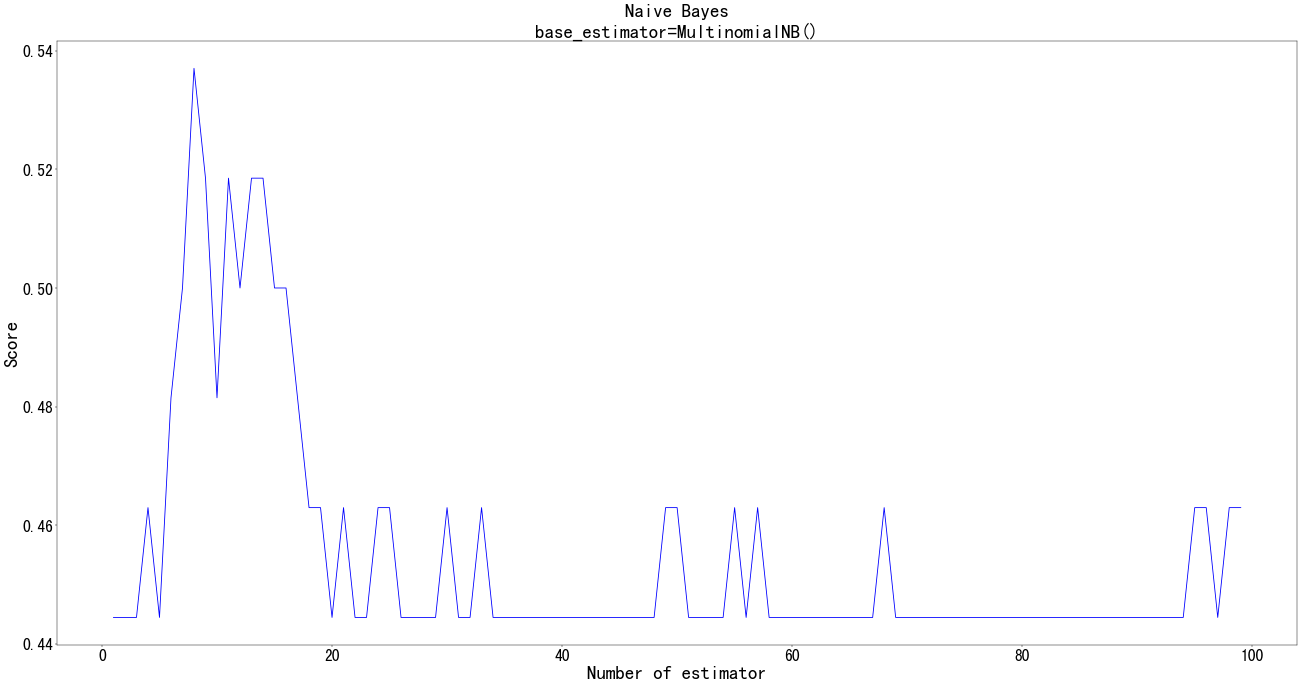

In [12]:
# Naive Bayes
# 标准化
# transfer = MinMaxScaler(feature_range=(0, 1))  # 【重点】朴素贝叶斯中特征值不能为负数
# x_train = transfer.fit_transform(X=x_train)
# x_test = transfer.transform(X=x_test)

estimator = MultinomialNB()
estimator = estimator.fit(X=x_train, y=y_train)  # 【重点】朴素贝叶斯中特征值不能为负数
print('Estimator in Naive Bayes: ', estimator)
print('Predict score in Naive Bayes:', estimator.score(X=x_test, y=y_test))
plot_bagging_ensemble(base_estimator=estimator,
              max_num_estimator=100,
              x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test,
              title=f'Naive Bayes\nbase_estimator={estimator}')

Best estimator in Decision tree:  DecisionTreeClassifier(max_depth=6, min_samples_split=5, random_state=90102)
Predict score in Decision tree: 0.6111111111111112
Best score in ensemble with bagging:  0.7037037037037037


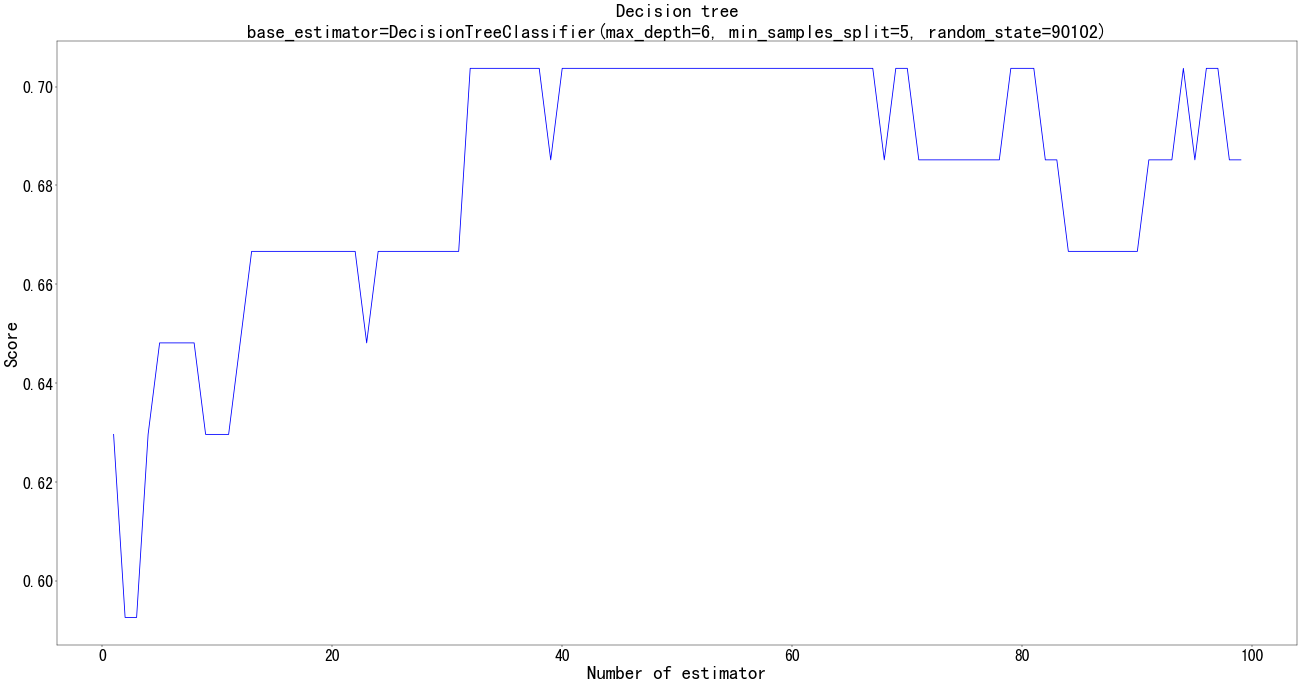

In [13]:
# Decision tree
para_grid = {
    'max_depth': range(2, 30),
    'min_samples_split': range(1, 10)
}
estimator = DecisionTreeClassifier(random_state=90102)
estimator = GridSearchCV(estimator=estimator, param_grid=para_grid, cv=10)
estimator = estimator.fit(X=x_train, y=y_train).best_estimator_
print('Best estimator in Decision tree: ', estimator)
print('Predict score in Decision tree:', estimator.score(X=x_test, y=y_test))
plot_bagging_ensemble(base_estimator=estimator,
              max_num_estimator=100,
              x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test,
              title=f'Decision tree\nbase_estimator={estimator}')

Best estimator in SVC:  SVC(C=5, degree=1, kernel='linear', random_state=90102)
Predict score in SVC: 0.6481481481481481


Best score in ensemble with bagging:  0.6111111111111112


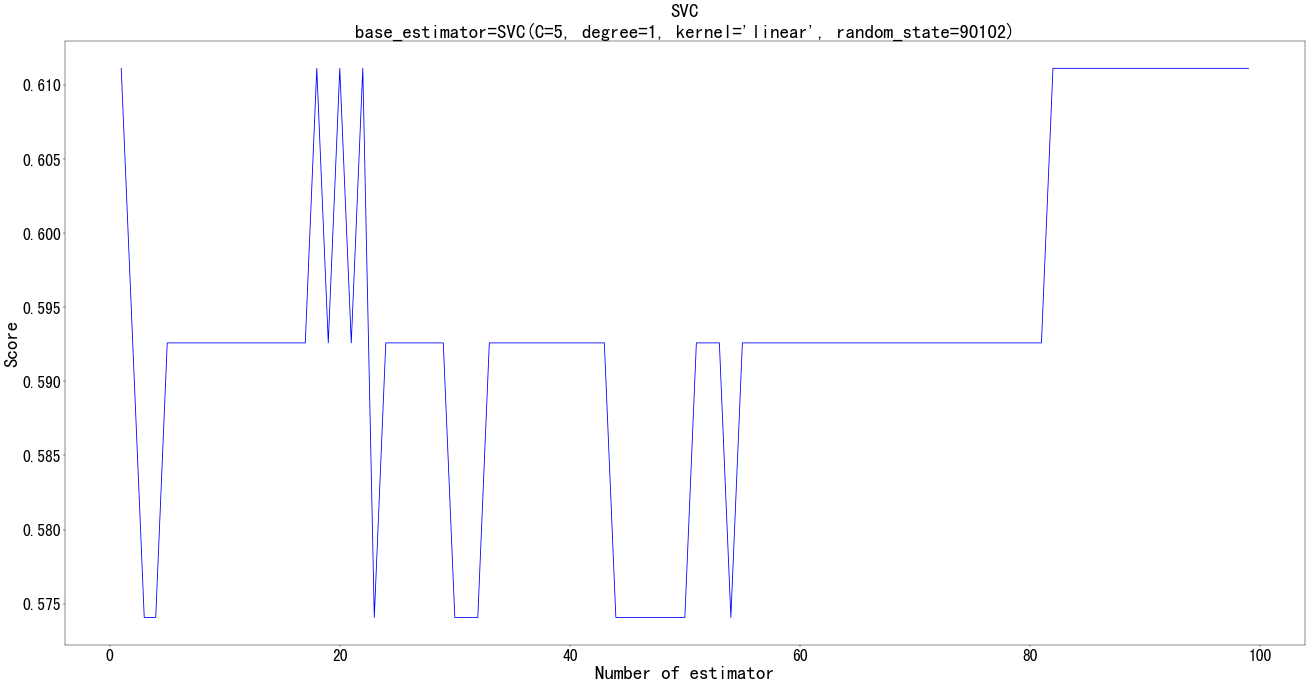

In [14]:
# SVM 支持向量机
para_grid = {
    'C': range(1, 100),
    'kernel': ('RBF', 'poly', 'linear', 'sigmodi'),
    'degree': range(1, 10)
}
estimator = SVC(random_state=90102)
estimator = GridSearchCV(estimator=estimator, param_grid=para_grid, cv=10)
estimator = estimator.fit(X=x_train, y=y_train).best_estimator_
print('Best estimator in SVC: ', estimator)
print('Predict score in SVC:', estimator.score(X=x_test, y=y_test))
plot_bagging_ensemble(base_estimator=estimator,
              max_num_estimator=100,
              x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test,
              title=f'SVC\nbase_estimator={estimator}')

## Задание 2

Исследуйте зависимость качества классификации от количества классификаторов в ансамбле для алгоритма бустинга (например, AdaBoost) на наборе данных vehicle.csv с различными базовыми классификаторами. Постройте графики зависимости качества классификации при различном числе классификаторов, объясните полученные результаты

研究在具有不同基础分类器的vehicle.csv数据集上，提升算法（如AdaBoost）的分类质量对集合中分类器数量的依赖性。绘制不同数量分类器的分类质量的依赖关系，解释结果

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


def plot_adaboost_ensemble(base_estimator, max_num_estimator, x_train, x_test, y_train, y_test, title):
    """绘制分类器数量和预测得分的关系图"""
    arr_score = []
    arr_num_tesimator = range(1, max_num_estimator)
    for i in arr_num_tesimator:
        ensemble_estimator = AdaBoostClassifier(base_estimator=base_estimator,
                                                n_estimators=i,
                                                learning_rate=1.0,
                                                # algorithm='SAMME.R',
                                                algorithm='SAMME',
                                                random_state=90102)
        ensemble_estimator.fit(X=x_train, y=y_train)
        score = ensemble_estimator.score(X=x_test, y=y_test)
        arr_score.append(score)

    print('Best score in ensemble with AdaBoost: ', max(arr_score))
    plt.figure(figsize=(40, 20), dpi=40)
    plt.plot(arr_num_tesimator, arr_score, c='r')
    plt.title(title, size=34)
    plt.xlabel('Number of estimator', size=34)
    plt.ylabel('Score', size=34)
    plt.tick_params(labelsize=28)
    plt.show()
    pass


data = pd.read_csv('vehicle.csv')
transfer = LabelEncoder()
data['Class'] = transfer.fit_transform(y=data['Class'])
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1:], random_state=90102)

In [17]:
data

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,3
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,2
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,3
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,2
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,3
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,2
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,2


KNN

由于 KNN 算法没有 sample_weight，所以不能使用 AdaBoot 进行！！！

KNeighborsClassifier doesn't support sample_weight.

Estimator in Naive Bayes:  GaussianNB()
Predict score in Naive Bayes: 0.41037735849056606
Best score in ensemble with AdaBoost:  0.7641509433962265


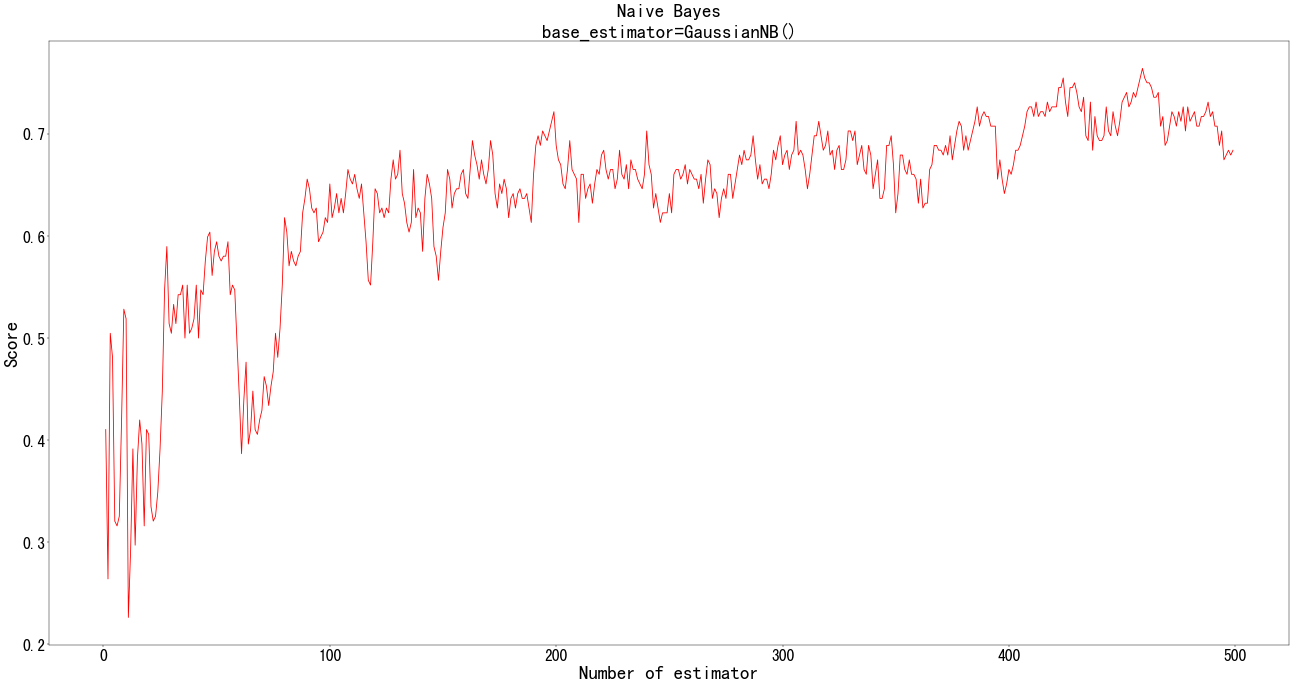

In [133]:
# Naive Bayes
estimator = GaussianNB()
estimator = estimator.fit(X=x_train, y=y_train)  # 【重点】朴素贝叶斯中特征值不能为负数
print('Estimator in Naive Bayes: ', estimator)
print('Predict score in Naive Bayes:', estimator.score(X=x_test, y=y_test))
plot_adaboost_ensemble(base_estimator=estimator,
                       max_num_estimator=500,
                       x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test,
                       title=f'Naive Bayes\nbase_estimator={estimator}')

Best estimator in Decision tree:  DecisionTreeClassifier(max_depth=8, random_state=90102)
Predict score in Decision tree: 0.6886792452830188
Best score in ensemble with AdaBoost:  0.8207547169811321


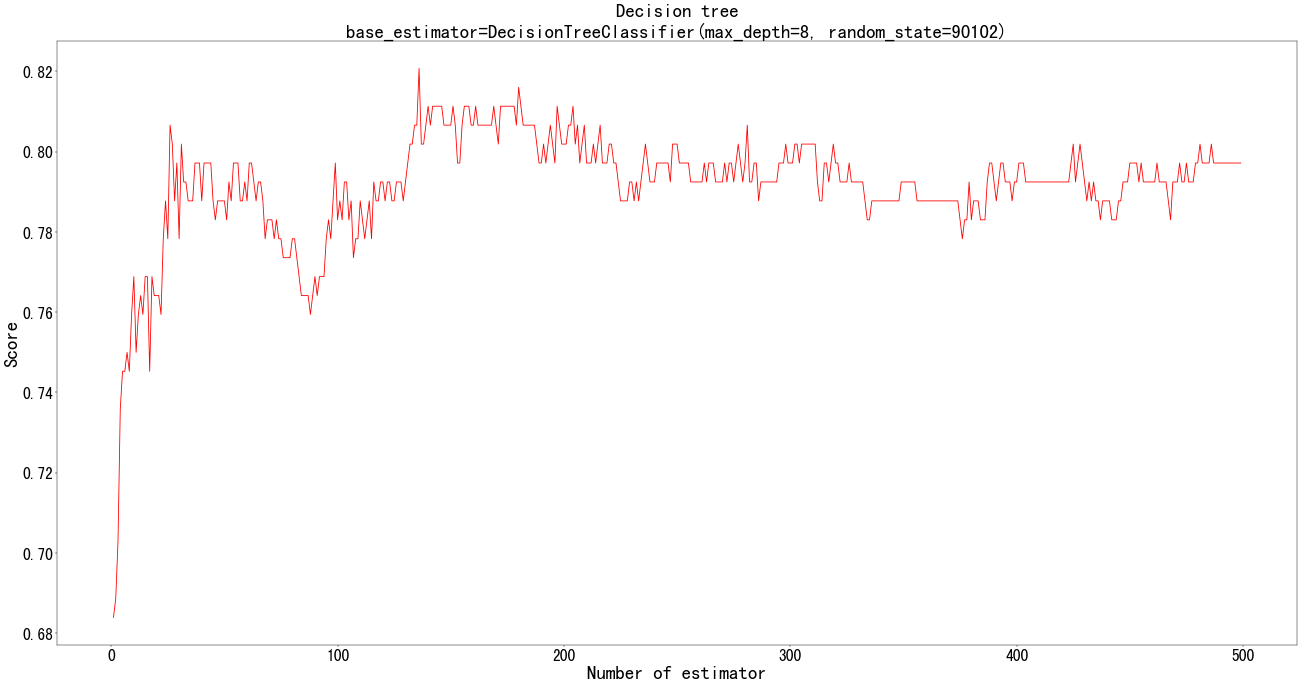

In [135]:
# Decision tree
para_grid = {
    'max_depth': range(2, 30),
    'min_samples_split': range(1, 10)
}
estimator = DecisionTreeClassifier(random_state=90102)
estimator = GridSearchCV(estimator=estimator, param_grid=para_grid, cv=10)
estimator = estimator.fit(X=x_train, y=y_train).best_estimator_
print('Best estimator in Decision tree: ', estimator)
print('Predict score in Decision tree:', estimator.score(X=x_test, y=y_test))
plot_adaboost_ensemble(base_estimator=estimator,
              max_num_estimator=500,
              x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test,
              title=f'Decision tree\nbase_estimator={estimator}')

Best estimator in SVC:  SVC(random_state=90102)
Predict score in SVC: 0.4858490566037736
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Best score in ensemble with AdaBoost:  0.24528301886792453


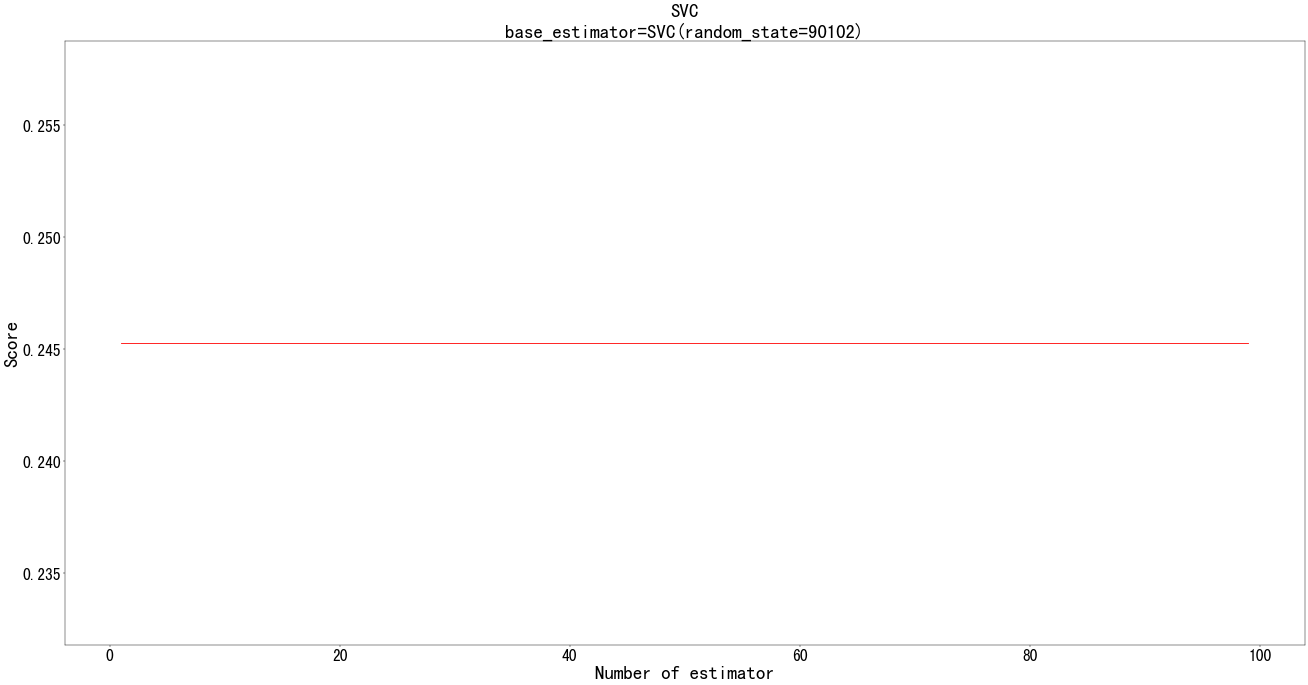

In [11]:
# SVM 支持向量机
# para_grid = {
#     'C': range(1, 20),
#     'kernel': ('RBF', 'poly', 'linear', 'sigmodi')
# }
estimator = SVC(random_state=90102)
# estimator = GridSearchCV(estimator=estimator, param_grid=para_grid, cv=3)
# estimator = estimator.fit(X=x_train, y=y_train).best_estimator_
estimator = estimator.fit(X=x_train, y=y_train)
print('Best estimator in SVC: ', estimator)
print('Predict score in SVC:', estimator.score(X=x_test, y=y_test))
plot_adaboost_ensemble(base_estimator=estimator,
              max_num_estimator=100,
              x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test,
              title=f'SVC\nbase_estimator={estimator}')

## Задание 3

Постройте мета-классификатор для набора данных titanic_train.csv используя стекинг и оцените качество классификации на titanic_train.csv

使用堆叠法为titanic_train.csv数据集建立元分类器，并评估titanic_train.csv的分类质量

In [5]:
# ------*------ coding: utf-8 ------*------
# @Time    : 2022/5/14 12:56
# @Author  : 冰糖雪狸 (NekoSilverfox)
# @Project : Scikit-learn
# @File    : 199 - 集成学习 - SPbSTU - lab4
# @Software: VS Code
# @Github  ：https://github.com/NekoSilverFox
# -----------------------------------------
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier


# 导入数据集
# Импортированные наборы данных
data = pd.read_csv('titanic_train.csv')

# 数据预处理
# Предварительная обработка данных
data_x = data[['Pclass', 'Sex', 'Age', 'Fare']]
data_y = data['Survived']
data_x['Age'].fillna(int(data_x['Age'].mean()), inplace=True)
data_x = data_x.to_dict(orient='records')

# 划分数据集
# Разделите набор данных
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=90102)

# 字典特征提取
transfer = DictVectorizer()
x_train = transfer.fit_transform(X=x_train)
x_test = transfer.transform(X=x_test)

# 预估器
# Предсказатель
print('Start to GridSearchCV: LogisticRegression')
lr_estimator = GridSearchCV(estimator=LogisticRegression(n_jobs=8, random_state=90102),
                             param_grid={'C': range(1, 30)},
                             cv=10).fit(X=x_train, y=y_train).best_estimator_

print('Start to GridSearchCV: RandomForestClassifier')
rfc_estimator = GridSearchCV(estimator=RandomForestClassifier(n_jobs=8, random_state=90102),
                             param_grid={'max_depth': range(2, 30),
                                         'min_samples_split': range(1, 10)},
                             cv=10).fit(X=x_train, y=y_train).best_estimator_

print('Start to GridSearchCV: ExtraTreesClassifier')
etc_estimator = GridSearchCV(estimator=ExtraTreesClassifier(n_jobs=8, random_state=90102),
                             param_grid={'max_depth': range(2, 30),
                                         'min_samples_split': range(1, 10)},
                             cv=10).fit(X=x_train, y=y_train).best_estimator_
# lr_estimator = LogisticRegression(n_jobs=8, random_state=90102)
# rfc_estimator = RandomForestClassifier(n_jobs=8, random_state=90102)
# etc_estimator = ExtraTreesClassifier(n_jobs=8, random_state=90102)

svm_estimator = LinearSVC(random_state=90102)
mlp_estimator = MLPClassifier(random_state=90102)

# 第一次训练
# Первая тренировка
estimators = (lr_estimator, rfc_estimator, etc_estimator, svm_estimator, mlp_estimator)
for estimator in estimators:
    print('Training on the: ', estimator)
    estimator.fit(X=x_train, y=y_train)

print('>>' * 50)

x_test_predict = np.empty((x_test.shape[0], len(estimators)), dtype=np.float32)
for index, estimator in enumerate(estimators):
    x_test_predict[:, index] = estimator.predict(X=x_test)
    print('Score on ', estimator, ' | Score on train: ', estimator.score(X=x_train, y=y_train), ' | Score on test: ', estimator.score(X=x_test, y=y_test))

Start to GridSearchCV: LogisticRegression
Start to GridSearchCV: RandomForestClassifier
Start to GridSearchCV: ExtraTreesClassifier
Training on the:  LogisticRegression(C=1, n_jobs=8, random_state=90102)
Training on the:  RandomForestClassifier(max_depth=9, min_samples_split=3, n_jobs=8,
                       random_state=90102)
Training on the:  ExtraTreesClassifier(max_depth=12, min_samples_split=3, n_jobs=8,
                     random_state=90102)
Training on the:  LinearSVC(random_state=90102)
Training on the:  MLPClassifier(random_state=90102)
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Score on  LogisticRegression(C=1, n_jobs=8, random_state=90102)  | Score on train:  0.7859281437125748  | Score on test:  0.7757847533632287
Score on  RandomForestClassifier(max_depth=9, min_samples_split=3, n_jobs=8,
                       random_state=90102)  | Score on train:  0.9341317365269461  | Score on test:  0.8340807174887892
Scor

In [17]:
# 输出作为输入
# Выход как вход
estimator_blender = RandomForestClassifier(n_estimators=100, oob_score=True, bootstrap=True, random_state=90102)
# estimator_blender = ExtraTreesClassifier(n_estimators=100, oob_score=True, bootstrap=True, random_state=90102)
estimator_blender.fit(X=x_test_predict, y=y_test)
oob_score = estimator_blender.oob_score_
print('OOB score: ', oob_score)
score = estimator_blender.score(X=x_test_predict, y=y_test)  # 【重点】注意这里的 X 是 x_test_predict
print('Score: ', score)

OOB score:  0.852017937219731
Score:  0.8699551569506726


In [ ]:
# 其实也可以一步到位：
from sklearn.ensemble import StackingClassifier
estimators = [('randomforest', RandomForestClassifier(n_estimators=5, random_state=0))]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_train, y_train).score(X_test, y_test)

In [4]:
(lr_estimator, rfc_estimator, etc_estimator, svm_estimator, mlp_estimator)

(LogisticRegression(C=1, n_jobs=8, random_state=90102),
 RandomForestClassifier(max_depth=9, min_samples_split=3, n_jobs=8,
                        random_state=90102),
 ExtraTreesClassifier(max_depth=12, min_samples_split=3, n_jobs=8,
                      random_state=90102),
 LinearSVC(random_state=90102),
 MLPClassifier(random_state=90102))